In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
data=data[['AveragePrice', "type", "region"]]
data
print(data.region.unique())
#Orlando, Boston, Chicago만 저장

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [3]:
data1=data.loc[(data.region=='Orlando')|(data.region=='Boston')|(data.region=='Chicago'), :]

In [4]:
#index초기화
data1.reset_index(drop=True, inplace=True)

In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula='AveragePrice~C(type)+C(region)+C(type):C(region)'
model=ols(formula, data1).fit()
aov_table=anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


type(x1)변수는 p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 type에 따른 AveragePrice 평균 간 차이가 존재한다.

region(x2)변수는 p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 region에 따른 AveragePrice 평균 간 차이가 존재한다.

마지막으로 교호작용을 확인하면 p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 교호작용이 있다고 해석할 수 있다.->교호작용 그래프

In [6]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

#독립변수(x1, x2), y-series로 변경
Type=data1['type']
region=data1['region']
price=data1['AveragePrice']

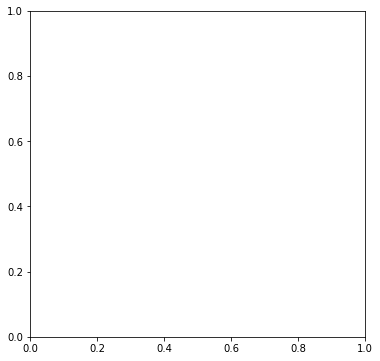

In [7]:
fig,ax=plt.subplots(figsize=(6,6))

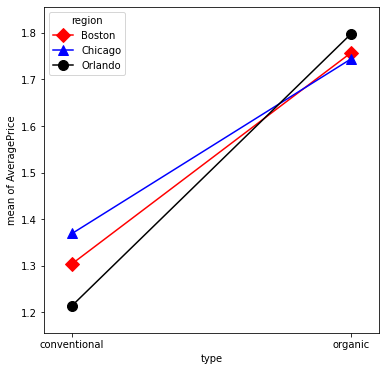

In [8]:
fig=interaction_plot(Type, region, price, colors=['red', 'blue', 'black'], markers=['D', '^', 'o'], ms=10, ax=ax)
fig

통계표에서 보았던 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다. 특히 orlando에서 conventional 대비 organic의 선호도가 높음을 알 수 있다.